In [122]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random



import matplotlib.pyplot as plt


# In[18]:


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


# In[28]:


def myOneHotEncoder(input_classes,input_data): # input data:- list of lists of same size, each row is a sample input
    enc = OneHotEncoder()
    enc.fit(input_classes)
    res = enc.transform(input_data)
    return res,enc 
    print(res.toarray()) #debug


# In[29]:


def myLabelBinarizer(labels,label_data): # input data:- list of total possible labels, list of labels of our dataset
    lb = LabelBinarizer()
    lb.fit(labels)
    res = lb.transform(label_data)
    return res,lb
    print(res.toarray()) #debug


# In[21]:


def splitdata(X,Y,testdata_size=0.3):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = testdata_size)
    return X_train,X_test,y_train,y_test


# In[22]:


def mymodel(input_len, output_len):
    model = Sequential()
    model.add(Dense(128, input_dim=input_len, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense( output_len, activation='softmax'))
    # Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


# In[33]:


def train(model,X_train,y_train,num_epochs=100,validate=True):
    if validate==False:
        history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=64)
    else:
        X_train,X_test,y_train,y_test = splitdata(X_train,y_train)
        history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=num_epochs, batch_size=64)
    return history

    #debug
    print(type(history))
    print(history.history.keys())
    print(type(history.history))
    x = history.history
    # print(x)

# history is a keras object containing 'loss' and 'acc'
# IMP :- history.history is a dict with keys 'loss' and 'acc'


# In[24]:


def test(X_test,lb):#lb ->labelBinarizerobject ,  returns list of labels
    y_pred = model.predict(X_test)
    return lb.inverse_transform(y_pred)
    
    


# In[25]:


def myplot_acc(history):
    plt.plot(history.history['acc'])
    if('val_acc' in history.history.keys()):
        plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def myplot_loss(history):
    plt.plot(history.history['loss'])
    if('val_loss' in history.history.keys()):
        plt.plot(history.history['val_loss'])
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()
    
def myplot_functions(functions,title="fn Plot",ylabel="y",xlabel="x",legend=[]): # plot list of lists of same sizes
    for fn in functons:
        plt.plot(fn)
    plt.title(title) 
    plt.ylabel(ylabel) 
    plt.xlabel(xlabel) 
    plt.legend(legend, loc='upper left') 
    plt.show()

In [123]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle


In [168]:
data_file = open('intents.json').read()
intents = json.loads(data_file)
intents = intents['intents']
# display(intents)
print(type(intents))
# print(intents)

<class 'list'>


In [169]:
X_list = []
Y_list = []
total_words = []
total_tags = []
for intent in intents:
    total_tags.append(intent['tag'])
    for sentence in intent['patterns']:
        words = nltk.word_tokenize(sentence)
        
        lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
        total_words.extend(lemmatized_words)
        X_list.append(lemmatized_words)
        Y_list.append(intent['tag'])
total_words = sorted(list(set(total_words)))
total_tags = sorted(list(set(total_tags)))

In [183]:
#generating encoded X in list of list formats for lack of a better solution

words_dict = dict()
for i,word in enumerate(total_words):
    words_dict[word]=i
tmp_list = [0]*len(total_words)
for words_in_list in X_list:
    tmp = []
    tmp.extend(tmp_list)
    for word in words_in_list:
        tmp[words_dict[word]]+=1
#     print(tmp)
    X_encoded_list.append(tmp)
    


In [184]:
X_nparray = np.array(X_encoded_list)
Y_nparray = np.array(Y_list)
print(X_nparray.shape[1])
print(X_nparray)

98
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [185]:
# X_encoded = myOneHotEncoder(X_nparray,X_nparray)
Y_encoded,lb = myLabelBinarizer(np.array(total_tags),Y_nparray)

# print(Y_encoded)

In [186]:
print(total_tags)
print(lb.classes_)
total_tags = lb.classes_ #important, cuz the binarizer sorts the input class and then encodes accordingly
print(Y_list)
print(Y_encoded)

['adverse_drug' 'blood_pressure' 'blood_pressure_search' 'goodbye'
 'greeting' 'hospital_search' 'noanswer' 'options' 'pharmacy_search'
 'search_blood_pressure_by_patient_id' 'search_hospital_by_params'
 'search_hospital_by_type' 'search_pharmacy_by_name' 'thanks']
['adverse_drug' 'blood_pressure' 'blood_pressure_search' 'goodbye'
 'greeting' 'hospital_search' 'noanswer' 'options' 'pharmacy_search'
 'search_blood_pressure_by_patient_id' 'search_hospital_by_params'
 'search_hospital_by_type' 'search_pharmacy_by_name' 'thanks']
['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'thanks', 'thanks', 'thanks', 'thanks', 'thanks', 'options', 'options', 'options', 'options', 'options', 'adverse_drug', 'adverse_drug', 'adverse_drug', 'adverse_drug', 'adverse_drug', 'blood_pressure', 'blood_pressure', 'blood_pressure', 'blood_pressure', 'blood_pressure', 'blood_pressure_search', 'blood_pressure_search', 'bl

In [187]:

print(len(X_nparray)==len(Y_encoded))
print(X_nparray.shape[1])
print(Y_encoded.shape[1])
type(Y_encoded)
from sklearn.utils import shuffle
X_shuffled,y_shuffled = shuffle(X_nparray, Y_encoded, random_state=0)

True
98
14


In [188]:
model = mymodel(X_shuffled.shape[1],y_shuffled.shape[1])
history = train(model,X_shuffled,y_shuffled,200,False)

Epoch 1/200
47/47 [==============================] - 0s 59us/step - loss: 2.6710 - acc: 0.0638
Epoch 2/200
47/47 [==============================] - 0s 78us/step - loss: 2.6366 - acc: 0.0638
Epoch 3/200
47/47 [==============================] - 0s 90us/step - loss: 2.6345 - acc: 0.0851
Epoch 4/200
47/47 [==============================] - 0s 78us/step - loss: 2.6095 - acc: 0.1064
Epoch 5/200
47/47 [==============================] - 0s 83us/step - loss: 2.6366 - acc: 0.0851
Epoch 6/200
47/47 [==============================] - 0s 86us/step - loss: 2.6044 - acc: 0.0638
Epoch 7/200
47/47 [==============================] - 0s 58us/step - loss: 2.6363 - acc: 0.0851
Epoch 8/200
47/47 [==============================] - 0s 62us/step - loss: 2.5921 - acc: 0.1277
Epoch 9/200
47/47 [==============================] - 0s 139us/step - loss: 2.5921 - acc: 0.0638
Epoch 10/200
47/47 [==============================] - 0s 77us/step - loss: 2.6240 - acc: 0.0851
Epoch 11/200
47/47 [============================

Epoch 87/200
47/47 [==============================] - 0s 59us/step - loss: 1.5725 - acc: 0.5106
Epoch 88/200
47/47 [==============================] - 0s 219us/step - loss: 1.5699 - acc: 0.5319
Epoch 89/200
47/47 [==============================] - 0s 127us/step - loss: 1.5074 - acc: 0.5745
Epoch 90/200
47/47 [==============================] - 0s 95us/step - loss: 1.4475 - acc: 0.5957
Epoch 91/200
47/47 [==============================] - 0s 75us/step - loss: 1.4938 - acc: 0.6170
Epoch 92/200
47/47 [==============================] - 0s 113us/step - loss: 1.5319 - acc: 0.5532
Epoch 93/200
47/47 [==============================] - 0s 72us/step - loss: 1.3891 - acc: 0.6383
Epoch 94/200
47/47 [==============================] - 0s 72us/step - loss: 1.5350 - acc: 0.5532
Epoch 95/200
47/47 [==============================] - 0s 85us/step - loss: 1.5553 - acc: 0.5106
Epoch 96/200
47/47 [==============================] - 0s 95us/step - loss: 1.3374 - acc: 0.5957
Epoch 97/200
47/47 [=================

Epoch 172/200
47/47 [==============================] - 0s 85us/step - loss: 0.5417 - acc: 0.9362
Epoch 173/200
47/47 [==============================] - 0s 160us/step - loss: 0.7902 - acc: 0.7660
Epoch 174/200
47/47 [==============================] - 0s 91us/step - loss: 0.5551 - acc: 0.8936
Epoch 175/200
47/47 [==============================] - 0s 138us/step - loss: 0.7673 - acc: 0.7234
Epoch 176/200
47/47 [==============================] - 0s 67us/step - loss: 0.5843 - acc: 0.8511
Epoch 177/200
47/47 [==============================] - 0s 62us/step - loss: 0.5074 - acc: 0.9149
Epoch 178/200
47/47 [==============================] - 0s 87us/step - loss: 0.5791 - acc: 0.9149
Epoch 179/200
47/47 [==============================] - 0s 70us/step - loss: 0.4617 - acc: 0.9574
Epoch 180/200
47/47 [==============================] - 0s 99us/step - loss: 0.5915 - acc: 0.8511
Epoch 181/200
47/47 [==============================] - 0s 89us/step - loss: 0.6435 - acc: 0.8085
Epoch 182/200
47/47 [=======

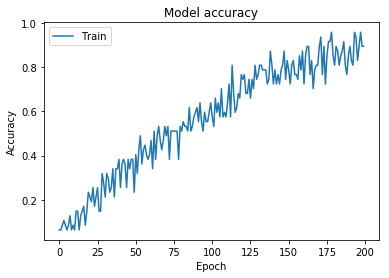

In [189]:
history.history.keys()
myplot_acc(history)

In [190]:
model.save('chatbot_model.h5', history)

In [191]:
print(len(total_words))
pickle.dump(total_words,open('words.pkl','wb'))
pickle.dump(total_tags,open('classes.pkl','wb'))

98


### excute only the following code for prediction

In [192]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random


In [193]:
intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

print(len(words))

98


In [194]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))
def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, total_words,show_details=False)
#     print(p)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list


In [195]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result
def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res


In [196]:
#Creating GUI with tkinter
import tkinter
from tkinter import *
def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)
        

base = Tk()
base.title("Hello")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)
#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)
ChatLog.config(state=DISABLED)
#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set
#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )
#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)
#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)
base.mainloop()